In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
df = pd.read_excel('Daten_Serkan_Angst_2023-03-09.xlsx')

In [114]:
#getting to know the dataframe

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [115]:
print(df.shape)

(29, 64)


In [116]:
print(df.dtypes)
print(df.columns)

ID                                                                                object
IM-Nr.                                                                            object
Alter Patient                                                                    float64
Geschlecht (0=w, 1=m)                                                            float64
Ethnizität (0=Kaukasier, 1=Asiatisch, 2=Afroamerikanisch, 3=andere)              float64
Beziehungsstatus (0=ledig 1=Partnerschaft 2=verheiratet 3= geschieden            float64
Kinder                                                                           float64
Beruf                                                                             object
Abschluss                                                                         object
Schuljahre                                                                       float64
Hobbies/Interessen                                                                object
Ehrenamtl. Tätigkeite

In [117]:
columns_to_investigate = ['Ehrenamtl. Tätigkeiten ','Epilepsiean. In der Familie ', 'Anfall innerhalb 24H vor Interview', 'Ethnizität (0=Kaukasier, 1=Asiatisch, 2=Afroamerikanisch, 3=andere)',]
for c in columns_to_investigate:
    print(c)
    print(df[c].value_counts())
    print('\n\n')

Ehrenamtl. Tätigkeiten 
nein               18
Jugendsport         1
Gemeinderat         1
Flüchtingshilfe     1
BRK                 1
Feuerwehr           1
Name: Ehrenamtl. Tätigkeiten , dtype: int64



Epilepsiean. In der Familie 
nein                        11
nein                         6
ja Oma väterl.               1
Sohn,Abscence Ep.            1
Oma mütterl.seits            1
ja Oma und Tante väterl.     1
ja  Vater                    1
Mutter als Kind              1
Name: Epilepsiean. In der Familie , dtype: int64



Anfall innerhalb 24H vor Interview
nein     23
Name: Anfall innerhalb 24H vor Interview, dtype: int64



Ethnizität (0=Kaukasier, 1=Asiatisch, 2=Afroamerikanisch, 3=andere)
0.0    23
Name: Ethnizität (0=Kaukasier, 1=Asiatisch, 2=Afroamerikanisch, 3=andere), dtype: int64





In [118]:
#figure out which to drop and then change dtypes
columns_to_drop = ['IM-Nr. ','Unnamed: 56', 'Datum Screeningbogen', 'Datum Interview', 'Korrelation Screening Interview?', 
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60',
       'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63','Anfall innerhalb 24H vor Interview', 'Ethnizität (0=Kaukasier, 1=Asiatisch, 2=Afroamerikanisch, 3=andere)']

df = df.drop(columns_to_drop, axis=1)

In [119]:
rows_to_drop = [x for x in range(23,29)]
df.drop(index=rows_to_drop, inplace=True)
df

,ID,Alter Patient,"Geschlecht (0=w, 1=m)",Beziehungsstatus (0=ledig 1=Partnerschaft 2=verheiratet 3= geschieden,Kinder,Beruf,Abschluss,Schuljahre,Hobbies/Interessen,Ehrenamtl. Tätigkeiten,Epilepsiean. In der Familie,Aufnahme EMU,Krankheitsbeginn,Erstdiagnose,Zeit Krankheitsbeg. Bis EMU größer 3J ja/nein,Epilepsiesyndrom,"Hemisphäre (0=r, 1=l, 2=multifokal, 3= unbekannt, 4= generalisiert)",GTKA (0=nein 1=ja),Anfallsfreq. Letztes Jahr,ASM Anzahl Aufnahme,ASM bei Aufnahme,ASM Resistenzen,ASM Nebenwirkungen,Sonstige Medikamente,Nicht medik. Therapie,Komorbiditäten somatisch,Komo psysch.,Suchtverhalten,Verstanden/unterstützt durch soziales Netz,GAD-7,BAI,BDI,Psych. Anamnese,Verschlechterung Lebensqual. Ja/Nein,Aufklärung EMU durch Behandler,Psych Behandlung,Akt. In psych. Behandlung,Profitiert von Behandlung,Hoffnungen/Erwartung EMU,EMU belastend?,Informationsbedarf EMU,Verbesserungsvorsch. EMU,Sorgen/Ängste EMU,Zusammenhang Epiliepsie/psych. Erkrankung,Angst momentan Thema?,Gespräch über Ängste Verganheit,Gespr. Hilfreich?,Eigene Strategien Umgang Angst?,Angstbeweltigungsstrategien probieren?,Gute Fee Frage?
0,P1,45.0,0.0,2.0,3.0,Bankkff,Realschule,10.0,"Musik, Tanzen, Sport",nein,nein,2022-10-24,2000.0,2001.0,ja (22J weil Behandler hielt es nicht für notw...,?,rechts,?,4/Jahr,NaN,Lamo,?,nein,nein,nein,nein,nein,nein,beides,13.0,21.0,10.0,nein,ja- um 2 Noten,nein,ja- 1 Sitzung vor ca 5 J - Angst um Kinder,nein,nein,Hauptsache Heilung (OP bzw. Medik.),ja-Angst vorm Absetzen der Medikamente,nein,freundlicheres Umfeld,ja- ob und wie heftig Anfall,nein,ja-Angst um Ihre Kinder,ja- bei der Sitzung vor ca. 5J,nein,ja- Spazieren gehen und mit beste Freundin reden,Entspannungsstrat.,Anfälle weg
1,P2,52.0,0.0,2.0,2.0,Ergotherapeutin,Abitur,13.0,"Malen, Lesen, Ausstellungen",nein,nein,2022-11-29,1988.0,1988.0,34,?,?,?,2-3/Woche,NaN,?,?,Gewichtszunahme durch Valpr.,nein,nein,Heuschupfen,nein,nein,beides,7.0,26.0,13.0,nein,"ja- um 1,5-2 Noten",ja- ca. 2008,nein,"nein, will aber",nein,genauere Diagn. Und bessere Medik Einstellung,ja-Gefühl des Festegefesseltseins,nein,nein,"ja- Valpr. Weiter nehmen, keine Besserung der ...",ja,ja- Kinder Zukunft,ja- Therapeutin der Tochter,ja,ja- klare Absprache mit Töcht. Und Ehrlichkeit,Psycho- und Entspannungstherapie,Anfälle weg
2,P3,30.0,1.0,2.0,0.0,Dipl.ing.,Abitur,13.0,Joggen,nein,nein,2022-12-07,2007.0,2007.0,nein,Fokal,links,?,3/Jahr,NaN,Oxca; Peram,Topi. Levet.Priva.Lako.Prega.,nein,nein,nein,Gangliogliom 2003,nein,nein,beides,6.0,21.0,10.0,nein,ja- um 1 Note,ja- ca. 2007,nein,nein,nein,OP und Besserung,nein,nein,nein,ja- Angst v. OP,nein,ja- Angst vor OP,nein,nein,"Ehefrau, Freunde, Sport",nein,Anfälle weg
3,P4,52.0,0.0,1.0,0.0,Krankenschwester,Ausland ?,10.0,"Sport, Freunde, Kochen",nein,nein,2022-12-09,1975.0,2001.0,>30 J,gen.,?,?,1/Woche,NaN,"Levet, Laco","Valpro, ?",nein,nein,nein,fragl. Leukämie,nein,nein,beides,1.0,20.0,3.0,PT 2011 wegen Ehe,"ja- um 1,5 Noten",ja- Ca 2020,PT 2011 Eheprobleme und Medikamente,nein,ja,wissen woher die Anfälle kommen,"ja, keine Bewegung",nein,Bewegung ermöglichen,nein,nein,nein,nein,nein,nein,nein,Anfälle weg
4,P5,18.0,1.0,0.0,0.0,Schüler,0,12.0,"Kickboxen, Sport, Malen",nein,Mutter als Kind,2023-01-02,2021.0,2022.0,nein,?,?,0,?,1,Laco,"Zoni, Ox, Lev",Zoni: Depr. Laco: leichter Schwindel Müdikgeit,nein,nein,nein,nein,nein,beides,6.0,6.0,7.0,Tics,ja- um 1 Note,nein,ja- 1 Jahr VT,nein,ja,Ursache Anfälle und Medik anpassen,nein,nein,nein,ja- Angst v. evtl. OP,nein,ja- vor Medi-Nebenwirkungen,nein,nein,ja- Tipps v. Internet,PT und Entspannung,Anfälle weg
5,P6,20.0,0.0,1.0,1.0,keiner,QA,11.0,Reiten,nein,nein,2023-01-02,2021.0,2021.0,nein,?,?,1,1 großer Anfall,3,"Leve, Lamo, Zoni",?,Zoni: Agressionen,nein,nein,gutartiger Tumor,nein,"2017 Alk, Kanabis",unterstützt,11.0,15.0,14.0,nein,ja- um 3 Noten,nein,nein,nein,NaN,evtl OP?,nein,nein,nein,nein,nein,ja- Zukunftsangst (Kind und Finanzen),nein,nein,nein,Enspannung,Anfälle weg
6,P7,56.0,1.0,0.0,0.0,Maler,QA,9.0,keine,nein,n

In [120]:
# Convert the 'Erstdiagnose' to datetime format
df['Erstdiagnose'] = pd.to_datetime(df['Erstdiagnose'], format='%Y')

# Calculate the time difference in years
df['time_diff'] = (df['Aufnahme EMU'] - df['Erstdiagnose']).dt.days / 365.25

# Display the updated DataFrame
df

,ID,Alter Patient,"Geschlecht (0=w, 1=m)",Beziehungsstatus (0=ledig 1=Partnerschaft 2=verheiratet 3= geschieden,Kinder,Beruf,Abschluss,Schuljahre,Hobbies/Interessen,Ehrenamtl. Tätigkeiten,Epilepsiean. In der Familie,Aufnahme EMU,Krankheitsbeginn,Erstdiagnose,Zeit Krankheitsbeg. Bis EMU größer 3J ja/nein,Epilepsiesyndrom,"Hemisphäre (0=r, 1=l, 2=multifokal, 3= unbekannt, 4= generalisiert)",GTKA (0=nein 1=ja),Anfallsfreq. Letztes Jahr,ASM Anzahl Aufnahme,ASM bei Aufnahme,ASM Resistenzen,ASM Nebenwirkungen,Sonstige Medikamente,Nicht medik. Therapie,Komorbiditäten somatisch,Komo psysch.,Suchtverhalten,Verstanden/unterstützt durch soziales Netz,GAD-7,BAI,BDI,Psych. Anamnese,Verschlechterung Lebensqual. Ja/Nein,Aufklärung EMU durch Behandler,Psych Behandlung,Akt. In psych. Behandlung,Profitiert von Behandlung,Hoffnungen/Erwartung EMU,EMU belastend?,Informationsbedarf EMU,Verbesserungsvorsch. EMU,Sorgen/Ängste EMU,Zusammenhang Epiliepsie/psych. Erkrankung,Angst momentan Thema?,Gespräch über Ängste Verganheit,Gespr. Hilfreich?,Eigene Strategien Umgang Angst?,Angstbeweltigungsstrategien probieren?,Gute Fee Frage?,time_diff
0,P1,45.0,0.0,2.0,3.0,Bankkff,Realschule,10.0,"Musik, Tanzen, Sport",nein,nein,2022-10-24,2000.0,2001-01-01,ja (22J weil Behandler hielt es nicht für notw...,?,rechts,?,4/Jahr,NaN,Lamo,?,nein,nein,nein,nein,nein,nein,beides,13.0,21.0,10.0,nein,ja- um 2 Noten,nein,ja- 1 Sitzung vor ca 5 J - Angst um Kinder,nein,nein,Hauptsache Heilung (OP bzw. Medik.),ja-Angst vorm Absetzen der Medikamente,nein,freundlicheres Umfeld,ja- ob und wie heftig Anfall,nein,ja-Angst um Ihre Kinder,ja- bei der Sitzung vor ca. 5J,nein,ja- Spazieren gehen und mit beste Freundin reden,Entspannungsstrat.,Anfälle weg,21.809719
1,P2,52.0,0.0,2.0,2.0,Ergotherapeutin,Abitur,13.0,"Malen, Lesen, Ausstellungen",nein,nein,2022-11-29,1988.0,1988-01-01,34,?,?,?,2-3/Woche,NaN,?,?,Gewichtszunahme durch Valpr.,nein,nein,Heuschupfen,nein,nein,beides,7.0,26.0,13.0,nein,"ja- um 1,5-2 Noten",ja- ca. 2008,nein,"nein, will aber",nein,genauere Diagn. Und bessere Medik Einstellung,ja-Gefühl des Festegefesseltseins,nein,nein,"ja- Valpr. Weiter nehmen, keine Besserung der ...",ja,ja- Kinder Zukunft,ja- Therapeutin der Tochter,ja,ja- klare Absprache mit Töcht. Und Ehrlichkeit,Psycho- und Entspannungstherapie,Anfälle weg,34.910335
2,P3,30.0,1.0,2.0,0.0,Dipl.ing.,Abitur,13.0,Joggen,nein,nein,2022-12-07,2007.0,2007-01-01,nein,Fokal,links,?,3/Jahr,NaN,Oxca; Peram,Topi. Levet.Priva.Lako.Prega.,nein,nein,nein,Gangliogliom 2003,nein,nein,beides,6.0,21.0,10.0,nein,ja- um 1 Note,ja- ca. 2007,nein,nein,nein,OP und Besserung,nein,nein,nein,ja- Angst v. OP,nein,ja- Angst vor OP,nein,nein,"Ehefrau, Freunde, Sport",nein,Anfälle weg,15.931554
3,P4,52.0,0.0,1.0,0.0,Krankenschwester,Ausland ?,10.0,"Sport, Freunde, Kochen",nein,nein,2022-12-09,1975.0,2001-01-01,>30 J,gen.,?,?,1/Woche,NaN,"Levet, Laco","Valpro, ?",nein,nein,nein,fragl. Leukämie,nein,nein,beides,1.0,20.0,3.0,PT 2011 wegen Ehe,"ja- um 1,5 Noten",ja- Ca 2020,PT 2011 Eheprobleme und Medikamente,nein,ja,wissen woher die Anfälle kommen,"ja, keine Bewegung",nein,Bewegung ermöglichen,nein,nein,nein,nein,nein,nein,nein,Anfälle weg,21.935661
4,P5,18.0,1.0,0.0,0.0,Schüler,0,12.0,"Kickboxen, Sport, Malen",nein,Mutter als Kind,2023-01-02,2021.0,2022-01-01,nein,?,?,0,?,1,Laco,"Zoni, Ox, Lev",Zoni: Depr. Laco: leichter Schwindel Müdikgeit,nein,nein,nein,nein,nein,beides,6.0,6.0,7.0,Tics,ja- um 1 Note,nein,ja- 1 Jahr VT,nein,ja,Ursache Anfälle und Medik anpassen,nein,nein,nein,ja- Angst v. evtl. OP,nein,ja- vor Medi-Nebenwirkungen,nein,nein,ja- Tipps v. Internet,PT und Entspannung,Anfälle weg,1.002053
5,P6,20.0,0.0,1.0,1.0,keiner,QA,11.0,Reiten,nein,nein,2023-01-02,2021.0,2021-01-01,nein,?,?,1,1 großer Anfall,3,"Leve, Lamo, Zoni",?,Zoni: Agressionen,nein,nein,gutartiger Tumor,nein,"2017 Alk, Kanabis",unterstützt,11.0,15.0,14.0,nein,ja- um 3 Noten,nein,nein,nein,NaN,evtl OP?,nein,nein,nein,nein,nein,ja- Zukunftsangst (Kind und Finanzen),ne

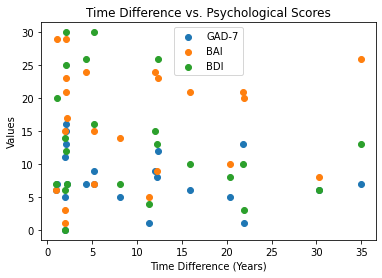

In [121]:
import matplotlib.pyplot as plt

# Create a scatter plot with one plot
plt.scatter(df['time_diff'], df['GAD-7'], label='GAD-7')
plt.scatter(df['time_diff'], df['BAI'], label='BAI')
plt.scatter(df['time_diff'], df['BDI'], label='BDI')

# Set labels and title
plt.xlabel('Time Difference (Years)')
plt.ylabel('Values')
plt.title('Time Difference vs. Psychological Scores')

# Show legend
plt.legend()

# Display the plot
plt.show()

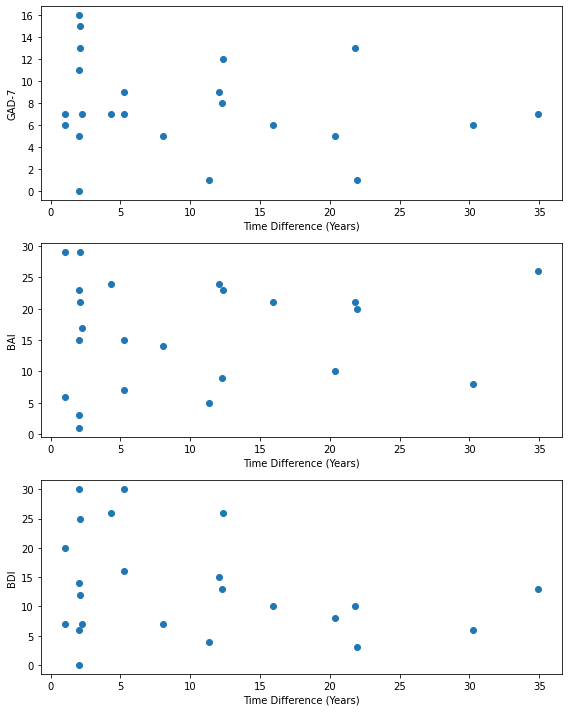

In [122]:
# Create three separate subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))

# Plot 1: GAD-7
ax1.scatter(df['time_diff'], df['GAD-7'])
ax1.set_ylabel('GAD-7')
ax1.set_xlabel('Time Difference (Years)')

# Plot 2: BAI
ax2.scatter(df['time_diff'], df['BAI'])
ax2.set_ylabel('BAI')
ax2.set_xlabel('Time Difference (Years)')

# Plot 3: BDI
ax3.scatter(df['time_diff'], df['BDI'])
ax3.set_ylabel('BDI')
ax3.set_xlabel('Time Difference (Years)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [123]:
# Calculate the correlation matrix
correlation_matrix = df[['time_diff', 'GAD-7', 'BAI', 'BDI']].corr()

# Display the correlation matrix
print(correlation_matrix)

           time_diff     GAD-7       BAI       BDI
time_diff   1.000000 -0.193742  0.090574 -0.278104
GAD-7      -0.193742  1.000000  0.585089  0.709171
BAI         0.090574  0.585089  1.000000  0.597337
BDI        -0.278104  0.709171  0.597337  1.000000


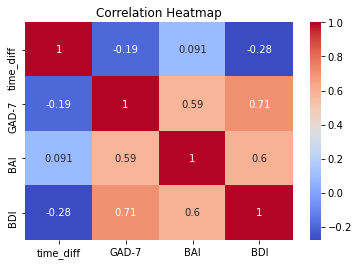

In [124]:
import seaborn as sns

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [125]:
from scipy.stats import pearsonr

# Assuming your DataFrame is named 'df' and the columns are 'time_diff' and 'GAD-7'

for test in ['GAD-7', 'BAI', 'BDI']:
    print(test)
    # Calculate the correlation coefficient and p-value
    correlation_coef, p_value = pearsonr(df['time_diff'], df[test])

    # Check if the correlation is statistically significant
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"The correlation is statistically significant (p-value: {p_value})")
    else:
        print(f"The correlation is not statistically significant (p-value: {p_value})")

GAD-7
The correlation is not statistically significant (p-value: 0.37574062873551056)
BAI
The correlation is not statistically significant (p-value: 0.6810737693175917)
BDI
The correlation is not statistically significant (p-value: 0.19883163863599357)


In [129]:
from scipy.stats import pearsonr


# Get the dimensions of the correlation matrix
n = correlation_matrix.shape[0]
p_values = np.zeros((n, n))  # Initialize matrix for p-values

# Calculate p-values for each correlation coefficient
for i in range(n):
    for j in range(n):
        _, p_value = pearsonr(correlation_matrix.iloc[:, i], correlation_matrix.iloc[:, j])
        p_values[i, j] = p_value

# Create a matrix indicating statistical significance
significance_matrix = np.where(p_values < 0.05, '*', '')

# Display the correlation matrix with significance indicators
correlation_matrix_with_significance = correlation_matrix.round(4).astype(str) + significance_matrix
print(correlation_matrix_with_significance)


          time_diff     GAD-7     BAI       BDI
time_diff      1.0*  -0.1937*  0.0906  -0.2781*
GAD-7      -0.1937*      1.0*  0.5851    0.7092
BAI          0.0906    0.5851    1.0*    0.5973
BDI        -0.2781*    0.7092  0.5973      1.0*


In [127]:
def count_elements(test, value):
    count = df[df[test] > value][test].count()
    return count

print(f"BAI= {count_elements('BAI',3)}")
print(f"BDI= {count_elements('BDI',3)}")
print(f"GAD-7= {count_elements('GAD-7',3)}")

BAI= 21
BDI= 21
GAD-7= 20


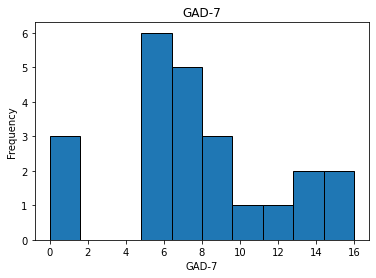

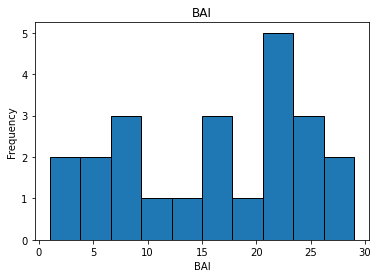

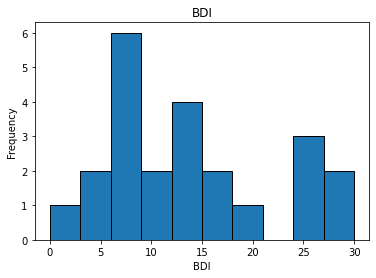

In [128]:
#Histograms for BAI, BDI, GAD-7

# Plot a histogram for 'GAD-7'
plt.hist(df['GAD-7'], bins=10, edgecolor='black')
plt.xlabel('GAD-7')
plt.ylabel('Frequency')
plt.title('GAD-7')

# Display the histogram for 'GAD-7'
plt.show()

# Plot a histogram for 'BAI'
plt.hist(df['BAI'], bins=10, edgecolor='black')
plt.xlabel('BAI')
plt.ylabel('Frequency')
plt.title('BAI')

# Display the histogram for 'BAI'
plt.show()

# Plot a histogram for 'BDI'
plt.hist(df['BDI'], bins=10, edgecolor='black')
plt.xlabel('BDI')
plt.ylabel('Frequency')
plt.title('BDI')

# Display the histogram for 'BDI'
plt.show()
